In [14]:

import os
import pandas as pd
import jieba
#获取文件名列表
def gettxt_list():
    path = "C:/TMdata/txt"
    all_list = os.listdir(path)

    txt_list=[]
    for onelist in all_list:
        if onelist.find('txt') != -1:
            txt_list.append(onelist)   
    print(txt_list)
    return txt_list
#获取文件内容列表
def readtxt(filename):
    #读取一个txt文件，内容保存在str中
    f=open('C:/TMdata/txt/'+filename,'r',encoding='UTF-8')
    str = ''
    for line in f.readlines():
        a = line.strip('\n')
        str = str + a
    #print(str)
    return str


    
#，文件名+文件内容：data的list of list
def getAlldata():
    filesdata = []
    txt_lists = gettxt_list()
    #print(txt_lists)
    for i in range(len(txt_lists)):
        filename = txt_lists[i]
        file_content = readtxt(filename)
        listi = [filename,file_content]
        filesdata.append(listi)
    #print(data)
    return filesdata

#数据框df，两列，一列标题名，一列为txt内容
def new_DataFrame():   
    filesdata= getAlldata()
    df_files = pd.DataFrame(data=filesdata,columns = ['filename','content'])
    return df_files

#分词去停用词，返回一个新的数据框
def m_cut(df):
    dict='C:/TMdata/计算机词汇.txt'
    jieba.load_userdict(dict)
    stoplist = list(pd.read_csv('C:/TMdata/stopwords.txt',names=['w'],sep='aaa',encoding='utf-8',engine='python').w)

    list_fenci = []
    for i in range(len(df)):
        listi = [w for w in jieba.cut(df.content[i]) if w not in stoplist and len(w) >1]
        list_fenci.append(listi)
        
    df['fenci'] = list_fenci
    return df




if __name__ == '__main__':
    df = new_DataFrame()
    df2 = m_cut(df)
    print(df2)
    print(type(df2))
   

['0.txt', '1.txt', '10.txt', '11.txt', '12.txt', '13.txt', '14.txt', '15.txt', '16.txt', '17.txt', '18.txt', '19.txt', '2.txt', '20.txt', '21.txt', '22.txt', '23.txt', '24.txt', '25.txt', '26.txt', '27.txt', '28.txt', '29.txt', '3.txt', '30.txt', '4.txt', '5.txt', '6.txt', '7.txt', '8.txt', '9.txt']
   filename                                            content  \
0     0.txt  ﻿操作系统、网络体系与服务器技术‖16‖操作系统安全加固技术研究◆莫怀海（国家计算机网络应急...   
1     1.txt  ﻿操作系统、网络体系与服务器技术‖16‖操作系统安全加固技术研究◆莫怀海（国家计算机网络应急...   
2    10.txt  ﻿•服务经纬•TUSHUGUANXUEKAN NO.1，2019图书馆学刊 2019年第1...   
3    11.txt  ﻿2019 年 3 月云计算辅助计算机操作系统教学路径研究姜 姗，胡鹏鹏 （河南中医药大学，...   
4    12.txt  ﻿/ 173 CHINA MANAGEMENT INFORMATIONIZATION201...   
5    13.txt  ﻿Information Security • 信息安全Electronic Technol...   
6    14.txt  ﻿Data Base Technique • 数据库技术Electronic Techno...   
7    15.txt  ﻿收稿日期： ２０１８ － ０７ － ０２基金项目：上 海 应 用 技 术 大 学 引 进...   
8    16.txt  ﻿经 营版2019.04科学管理 >>>在经济统计数据库中有着数量很大的数据。 而大部分数据...   
9    17.txt  ﻿第 26 卷 第 4 期2019 年 4 月仪器

In [1]:
#用extract_tags函数去停用词，根据TF-IDF提取特征词，并在这之前去掉停用词

import jieba.analyse as ana
import pandas
f=open('C:/TMdata/txt/0.txt','r',encoding='UTF-8')
str = ''
for line in f.readlines():
    a = line.strip('\n')
    str = str + a
    #print(str)
#print(str)
ana.set_stop_words('C:/TMdata/stopwords.txt')
ana.extract_tags(str,topK=20)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 1.033 seconds.
Prefix dict has been built succesfully.


['加固',
 '信息系统',
 '操作系统',
 '系统',
 '网络安全',
 '检查',
 '技术',
 'Linux',
 '信息安全',
 '账号',
 '运行',
 '审核',
 '登录',
 '保护',
 '服务',
 '命令',
 '用户',
 '计算机',
 '启用',
 '计算机网络']

In [9]:
#词频统计
#1.使用pandas统计
import pandas as pd
import jieba
f=open('C:/TMdata/txt/0.txt','r',encoding='UTF-8')
stoplist = list(pd.read_csv('C:/TMdata/stopwords.txt',names=['w'],sep='aaa',encoding='utf-8',engine='python').w)
str = ''
for line in f.readlines():
    a = line.strip('\n')
    str = str + a
    
word_list = [w for w in jieba.cut(str) if w not in stoplist and len(w) >1]
#rint(word_list),分词后的list

df = pd.DataFrame(word_list,columns = ['word'])
#统计
result = df.groupby(['word']).size()
freqlist = result.sort_values(ascending=False)
freqlist[:20]

#2.使用nltk统计词频
import nltk
fdist = nltk.FreqDist(word_list)
fdist.most_common(5)

[('加固', 60), ('系统', 36), ('信息系统', 27), ('技术', 24), ('检查', 24)]

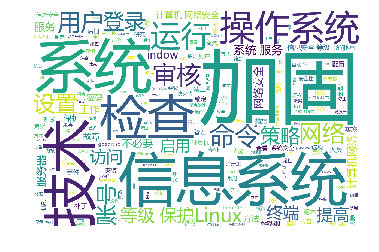

In [12]:
#词云
#绘制词云
import wordcloud
import matplotlib.pyplot as plt
import pandas as pd
import jieba
f=open('C:/TMdata/txt/0.txt','r',encoding='UTF-8')
stoplist = list(pd.read_csv('C:/TMdata/stopwords.txt',names=['w'],sep='aaa',encoding='utf-8',engine='python').w)
str = ''
for line in f.readlines():
    a = line.strip('\n')
    str = str + a
    
word_list = [w for w in jieba.cut(str) if w not in stoplist and len(w) >1]

myfont=r'C:\Windows\Fonts\msyh.ttc'
cloudobj = wordcloud.WordCloud(font_path = myfont, 
    width = 1200, height = 800,
    mode = "RGBA", background_color = '#ffffff',
    stopwords = stoplist).generate(' '.join(word_list))  

plt.imshow(cloudobj)
plt.axis("off")
plt.show()

cloudobj.to_file('C:/TMdata/txt/ciyun.png')

In [15]:
import os
import pandas as pd
import jieba

class MyDataFrame():
    def gettxt_list():
        path = "C:/TMdata/txt"
        all_list = os.listdir(path)
    
        txt_list=[]
        for onelist in all_list:
            if onelist.find('txt') != -1:
                txt_list.append(onelist)   
        print(txt_list)
        return txt_list
    #获取文件内容列表
    def readtxt(filename):
        #读取一个txt文件，内容保存在str中
        f=open('C:/TMdata/txt/'+filename,'r',encoding='UTF-8')
        str = ''
        for line in f.readlines():
            a = line.strip('\n')
            str = str + a
        #print(str)
        return str
    
    
        
    #，文件名+文件内容：data的list of list
    def getAlldata():
        filesdata = []
        txt_lists = MyDataFrame.gettxt_list()
        #print(txt_lists)
        for i in range(len(txt_lists)):
            filename = txt_lists[i]
            file_content = MyDataFrame.readtxt(filename)
            listi = [filename,file_content]
            filesdata.append(listi)
        #print(data)
        return filesdata
    
    #数据框df，两列，一列标题名，一列为txt内容
    def new_DataFrame():   
        filesdata= MyDataFrame.getAlldata()
        df_files = pd.DataFrame(data=filesdata,columns = ['filename','content'])
        return df_files
    
    #分词去停用词，返回一个新的数据框
    def m_cut(df):
        dict='C:/TMdata/计算机词汇.txt'
        jieba.load_userdict(dict)
        stoplist = list(pd.read_csv('C:/TMdata/stopwords.txt',names=['w'],sep='aaa',encoding='utf-8',engine='python').w)
    
        list_fenci = []
        for i in range(len(df)):
            listi = [w for w in jieba.cut(df.content[i]) if w not in stoplist and len(w) >1]
            list_fenci.append(listi)
            
        df['fenci'] = list_fenci
        return df

'0.24.2'

In [18]:
import os
import pandas as pd
import jieba

class MyDataFrame():
    def gettxt_list():
        path = "C:/TMdata/txt"
        all_list = os.listdir(path)
    
        txt_list=[]
        for onelist in all_list:
            if onelist.find('txt') != -1:
                txt_list.append(onelist)   
        print(txt_list)
        return txt_list
    #获取文件内容列表
    def readtxt(filename):
        #读取一个txt文件，内容保存在str中
        f=open('C:/TMdata/txt/'+filename,'r',encoding='UTF-8')
        str = ''
        for line in f.readlines():
            a = line.strip('\n')
            str = str + a
        #print(str)
        return str
    
    
        
    #，文件名+文件内容：data的list of list
    def getAlldata():
        filesdata = []
        txt_lists = MyDataFrame.gettxt_list()
        #print(txt_lists)
        for i in range(len(txt_lists)):
            filename = txt_lists[i]
            file_content = MyDataFrame.readtxt(filename)
            listi = [filename,file_content]
            filesdata.append(listi)
        #print(data)
        return filesdata
    
    #数据框df，两列，一列标题名，一列为txt内容
    def new_DataFrame():   
        filesdata= MyDataFrame.getAlldata()
        df_files = pd.DataFrame(data=filesdata,columns = ['filename','content'])
        return df_files
    
    #分词去停用词，返回一个新的数据框
    def m_cut(df):
        dict='C:/TMdata/计算机词汇.txt'
        jieba.load_userdict(dict)
        stoplist = list(pd.read_csv('C:/TMdata/stopwords.txt',names=['w'],sep='aaa',encoding='utf-8',engine='python').w)
    
        list_fenci = []
        for i in range(len(df)):
            listi = [w for w in jieba.cut(df.content[i]) if w not in stoplist and len(w) >1]
            list_fenci.append(listi)
            
        df['fenci'] = list_fenci
        return df





import wordcloud
import matplotlib.pyplot as plt
import pandas as pd
import MyDataFrame 

class CiYun():
    #词云
#绘制词云
    def saveCiyun():
    
        df = MyDataFrame.new_DataFrame()
        df2 = MyDataFrame.m_cut(df)
        
        list_fenci = df2.iloc[:,2]
        print(list_fenci)
        """
        stoplist = list(pd.read_csv('C:/TMdata/stopwords.txt',names=['w'],sep='aaa',encoding='utf-8',engine='python').w)
        myfont=r'C:\Windows\Fonts\msyh.ttc'
        cloudobj = wordcloud.WordCloud(font_path = myfont, 
            width = 1200, height = 800,
            mode = "RGBA", background_color = '#ffffff',
            stopwords = stoplist).generate(' '.join())  
        
        plt.imshow(cloudobj)
        plt.axis("off")
        plt.show()
        
        cloudobj.to_file('C:/TMdata/txt/ciyun.png')
        """
        
if __name__ == '__main__':
    CiYun.saveCiyun()

ModuleNotFoundError: No module named 'MyDataFrame'